In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
# Create a list of the dataset
data_files = os.listdir('./data')

In [4]:
columns = ['Square_id', 'Time_interval', 'Country_code', 'SMS_in',
           'SMS_out', 'Call_in','Call_out', 'Internet_traffic']

In [18]:
# Read the data and concat them
raw = pd.DataFrame()
for file in data_files:
    read = pd.read_csv('./data/'+file, sep='\t',header=None, names=columns, parse_dates=True)
    raw = pd.concat([raw, read], ignore_index=True)
    #print(raw.count())

In [19]:
raw.count()

Square_id           53325752
Time_interval       53325752
Country_code        53325752
SMS_in              28776137
SMS_out             16608003
Call_in             16167574
Call_out            22898516
Internet_traffic    26621602
dtype: int64

In [20]:
# Conver time interval to date format
raw['start_time'] = pd.to_datetime(raw.Time_interval, unit='ms', utc=True).dt.tz_convert('CET').dt.tz_localize(None)

In [21]:
raw.head()

,Square_id,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic,start_time
0,1,1383865200000,39,0.518794,0.245790,0.053438,0.108039,10.296910,2013-11-08 00:00:00
1,1,1383865800000,0,0.027300,NaN,NaN,NaN,NaN,2013-11-08 00:10:00
2,1,1383865800000,33,NaN,NaN,0.027300,NaN,NaN,2013-11-08 00:10:00
3,1,1383865800000,39,0.122337,0.138375,0.027925,NaN,7.384440,2013-11-08 00:10:00
4,1,1383866400000,39,0.238187,0.191813,0.001787,0.052275,8.531256,2013-11-08 00:20:00


In [22]:
# Group data by each grid(square id)
group_by_grid_id = raw.groupby('Square_id')

In [23]:
for name, data in group_by_grid_id:
    print(name)
    print(data)
    break

1
          Square_id  Time_interval  Country_code    SMS_in   SMS_out  \
0                 1  1383865200000            39  0.518794  0.245790   
1                 1  1383865800000             0  0.027300       NaN   
2                 1  1383865800000            33       NaN       NaN   
3                 1  1383865800000            39  0.122337  0.138375   
4                 1  1383866400000            39  0.238187  0.191813   
...             ...            ...           ...       ...       ...   
48483468          1  1383345000000            39  0.346226  0.293951   
48483469          1  1383345600000             0  0.027300       NaN   
48483470          1  1383345600000            39  0.111613  0.057013   
48483471          1  1383346200000             0  0.130687       NaN   
48483472          1  1383346200000            39  0.398501  0.349715   

           Call_in  Call_out  Internet_traffic          start_time  
0         0.053438  0.108039         10.296910 2013-11-08 00:00:

In [24]:
# grid 1 data as an example
grid_1 = group_by_grid_id.get_group(1)

In [33]:
# Hourly grid 1 data
Hour = grid_1.groupby(pd.Grouper(key='start_time', freq='H')).sum()

<Axes: xlabel='start_time'>

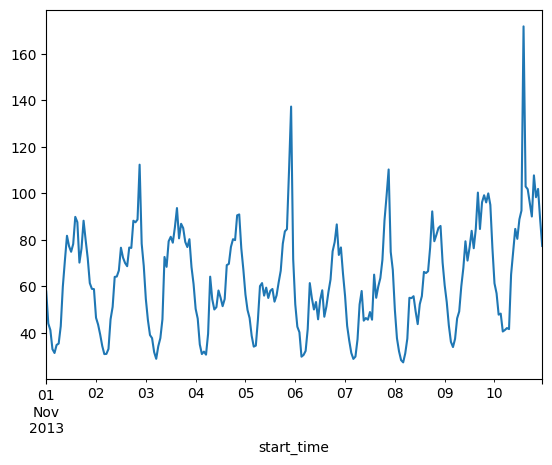

In [34]:
Hour['Internet_traffic'].plot()

In [27]:
hour_data = raw.groupby(['Square_id', pd.Grouper(key='start_time', freq='H')]).sum()

In [28]:
hour_data.head(10)

Time_interval  Country_code    SMS_in  \
Square_id start_time                                                    
1         2013-11-01 00:00:00  17982403800000           267  2.084285   
          2013-11-01 01:00:00  15215920800000           234  1.163624   
          2013-11-01 02:00:00  11066154000000           283  0.415579   
          2013-11-01 03:00:00   9682907400000           234  1.152067   
          2013-11-01 04:00:00  11066212200000           234  0.354453   
          2013-11-01 05:00:00  12449517600000           280  0.166924   
          2013-11-01 06:00:00  15216122400000           274  0.215000   
          2013-11-01 07:00:00  16599444600000           654  0.878780   
          2013-11-01 08:00:00  17982780600000           589  3.664881   
          2013-11-01 09:00:00  24899298000000           437  4.359792   

                                SMS_out   Call_in  Call_out  Internet_traffic  
Square_id start_time                                                           
1         2013-11-01 00:00:00  1.104749  0.591930  0.429290         57.799009  
          2013-11-01 01:00:00  0.770031  0.190564  0.194139         44.046899  
          2013-11-01 02:00:00  0.300391  0.027925  0.135964         41.207149  
          2013-11-01 03:00:00  0.895724  0.001787  0.026137         33.022070  
          2013-11-01 04:00:00  0.511192  0.005362  0.026137         31.376930  
          2013-11-01 05:00:00  0.195388  0.027925  0.184125         34.841592  
          2013-11-01 06:00:00  0.115812  0.216787  0.157988         35.416125  
          2013-11-01 07:00:00  0.244712  0.243464  0.494615         42.933504  
          2013-11-01 08:00:00  1.436650  1.160892  1.276790         59.880782  
          2013-11-01 09:00:00  2.115268  2.911341  3.221891         71.135509

In [29]:
hour_data.loc[:3]

Time_interval  Country_code    SMS_in  \
Square_id start_time                                                    
1         2013-11-01 00:00:00  17982403800000           267  2.084285   
          2013-11-01 01:00:00  15215920800000           234  1.163624   
          2013-11-01 02:00:00  11066154000000           283  0.415579   
          2013-11-01 03:00:00   9682907400000           234  1.152067   
          2013-11-01 04:00:00  11066212200000           234  0.354453   
...                                       ...           ...       ...   
3         2013-11-10 19:00:00  24913938600000           782  4.315187   
          2013-11-10 20:00:00  34602787200000          1860  5.406957   
          2013-11-10 21:00:00  26298190800000           533  6.815513   
          2013-11-10 22:00:00  22145901000000           418  5.579124   
          2013-11-10 23:00:00  17993590200000           280  2.855232   

                                SMS_out   Call_in  Call_out  Internet_traffic  
Square_id start_time                                                           
1         2013-11-01 00:00:00  1.104749  0.591930  0.429290         57.799009  
          2013-11-01 01:00:00  0.770031  0.190564  0.194139         44.046899  
          2013-11-01 02:00:00  0.300391  0.027925  0.135964         41.207149  
          2013-11-01 03:00:00  0.895724  0.001787  0.026137         33.022070  
          2013-11-01 04:00:00  0.511192  0.005362  0.026137         31.376930  
...                                 ...       ...       ...               ...  
3         2013-11-10 19:00:00  2.879579  3.271254  3.617796        108.267918  
          2013-11-10 20:00:00  3.621854  3.179884  3.254774         99.007402  
          2013-11-10 21:00:00  5.539402  1.865652  1.873768        102.789497  
          2013-11-10 22:00:00  4.161100  1.113661  0.837951         89.256965  
          2013-11-10 23:00:00  2.444372  0.552772  0.582778         77.837638  

[720 rows x 7 columns]

In [30]:
hour_data.loc[:50].index[1][1]

Timestamp('2013-11-01 01:00:00')

In [44]:
# Use grid 1 as prediction
hour_data.loc[1].head()

,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic
start_time,,,,,,,
2013-11-01 00:00:00,17982403800000,267,2.084285,1.104749,0.591930,0.429290,57.799009
2013-11-01 01:00:00,15215920800000,234,1.163624,0.770031,0.190564,0.194139,44.046899
2013-11-01 02:00:00,11066154000000,283,0.415579,0.300391,0.027925,0.135964,41.207149
2013-11-01 03:00:00,9682907400000,234,1.152067,0.895724,0.001787,0.026137,33.022070
2013-11-01 04:00:00,11066212200000,234,0.354453,0.511192,0.005362,0.026137,31.376930


In [45]:
Hour[f'avg_internet{1}'] = hour_data.loc[1]['Internet_traffic'].shift(1)

In [50]:
Hour = Hour.dropna()
Hour.head()

,Square_id,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic,avg_internet1
start_time,,,,,,,,,
2013-11-01 01:00:00,11,15215920800000,234,1.163624,0.770031,0.190564,0.194139,44.046899,57.799009
2013-11-01 02:00:00,8,11066154000000,283,0.415579,0.300391,0.027925,0.135964,41.207149,44.046899
2013-11-01 03:00:00,7,9682907400000,234,1.152067,0.895724,0.001787,0.026137,33.022070,41.207149
2013-11-01 04:00:00,8,11066212200000,234,0.354453,0.511192,0.005362,0.026137,31.376930,33.022070
2013-11-01 05:00:00,9,12449517600000,280,0.166924,0.195388,0.027925,0.184125,34.841592,31.376930


In [56]:
split = '2013-11-10 00:00:00'
train = Hour.loc[Hour.index < split]
test = Hour.loc[Hour.index >= split]

In [57]:
features = [f'avg_internet1']
target = 'Internet_traffic'

In [59]:
train[features]

,avg_internet1
start_time,
2013-11-01 01:00:00,57.799009
2013-11-01 02:00:00,44.046899
2013-11-01 03:00:00,41.207149
2013-11-01 04:00:00,33.022070
2013-11-01 05:00:00,31.376930
...,...
2013-11-09 19:00:00,96.146703
2013-11-09 20:00:00,99.150877
2013-11-09 21:00:00,96.072555


In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()
model.fit(train[features], train[target])

LinearRegression()

In [62]:
model.score(train[features], train[target])

0.7488216560314118

In [63]:
test['predicted_traffic'] = model.predict(test[features])

/var/folders/yt/vt2nsgcj3mn_2hpygxfqs0_w0000gn/T/ipykernel_5024/3650919130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_traffic'] = model.predict(test[features])


In [65]:
test.head()

,Square_id,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic,avg_internet1,predicted_traffic
start_time,,,,,,,,,,
2013-11-10 00:00:00,13,17992514400000,318,2.198689,1.785117,0.733709,0.644205,61.299140,76.482219,74.537378
2013-11-10 01:00:00,8,11072344200000,278,1.225913,1.232070,0.140701,0.325365,57.000640,61.299140,61.382736
2013-11-10 02:00:00,8,11072376000000,280,0.896349,1.135331,0.161477,0.222603,47.856536,57.000640,57.658510
2013-11-10 03:00:00,12,16608603600000,360,0.587902,0.465698,0.000000,0.134176,48.291493,47.856536,49.736045
2013-11-10 04:00:00,9,12456487200000,280,0.429829,0.494701,0.026137,0.054601,40.604853,48.291493,50.112892


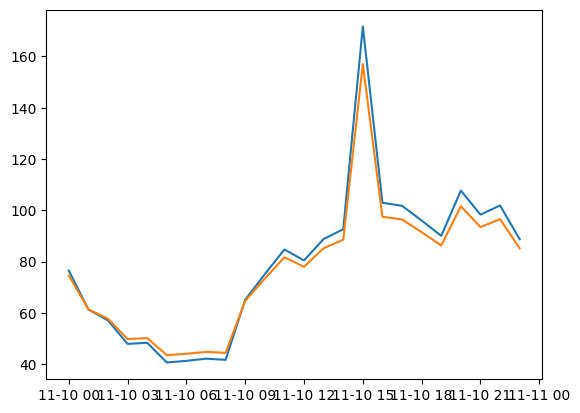

In [70]:
plt.plot(test.index, test['avg_internet1'])
plt.plot(test.index, test['predicted_traffic'])

In [71]:
# predict grid 1 data
test_df = Hour
test_df['predicted_traffic'] = model.predict(Hour[features])

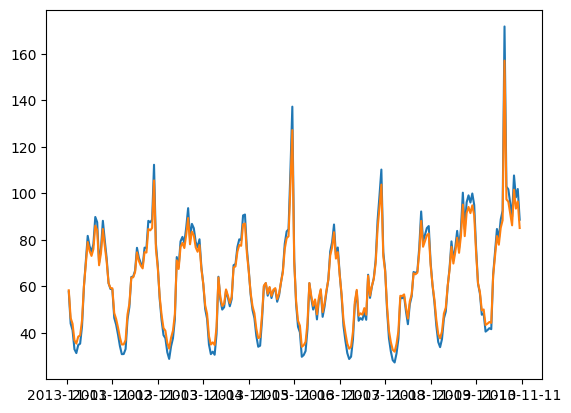

In [72]:
plt.plot(Hour.index, Hour['avg_internet1'])
plt.plot(Hour.index, Hour['predicted_traffic'])

In [ ]:
# paper reproduction (failed bigger sliding window since not enough ram)

In [73]:
r = 100
l = 100
grid_array = np.zeros((r, l))
for i in range(r):
        for j in range(l):
            grid_array[i, j] = i*100 + j + 1

In [75]:
# sliding window
slide_size = 3
for i in range(r-slide_size):
    for j in range(l-slide_size):
        print(grid_array[i:i+slide_size, j:j+slide_size])

[[  1.   2.   3.]
 [101. 102. 103.]
 [201. 202. 203.]]
[[  2.   3.   4.]
 [102. 103. 104.]
 [202. 203. 204.]]
[[  3.   4.   5.]
 [103. 104. 105.]
 [203. 204. 205.]]
[[  4.   5.   6.]
 [104. 105. 106.]
 [204. 205. 206.]]
[[  5.   6.   7.]
 [105. 106. 107.]
 [205. 206. 207.]]
[[  6.   7.   8.]
 [106. 107. 108.]
 [206. 207. 208.]]
[[  7.   8.   9.]
 [107. 108. 109.]
 [207. 208. 209.]]
[[  8.   9.  10.]
 [108. 109. 110.]
 [208. 209. 210.]]
[[  9.  10.  11.]
 [109. 110. 111.]
 [209. 210. 211.]]
[[ 10.  11.  12.]
 [110. 111. 112.]
 [210. 211. 212.]]
[[ 11.  12.  13.]
 [111. 112. 113.]
 [211. 212. 213.]]
[[ 12.  13.  14.]
 [112. 113. 114.]
 [212. 213. 214.]]
[[ 13.  14.  15.]
 [113. 114. 115.]
 [213. 214. 215.]]
[[ 14.  15.  16.]
 [114. 115. 116.]
 [214. 215. 216.]]
[[ 15.  16.  17.]
 [115. 116. 117.]
 [215. 216. 217.]]
[[ 16.  17.  18.]
 [116. 117. 118.]
 [216. 217. 218.]]
[[ 17.  18.  19.]
 [117. 118. 119.]
 [217. 218. 219.]]
[[ 18.  19.  20.]
 [118. 119. 120.]
 [218. 219. 220.]]
[[ 19.  20

[[1389. 1390. 1391.]
 [1489. 1490. 1491.]
 [1589. 1590. 1591.]]
[[1390. 1391. 1392.]
 [1490. 1491. 1492.]
 [1590. 1591. 1592.]]
[[1391. 1392. 1393.]
 [1491. 1492. 1493.]
 [1591. 1592. 1593.]]
[[1392. 1393. 1394.]
 [1492. 1493. 1494.]
 [1592. 1593. 1594.]]
[[1393. 1394. 1395.]
 [1493. 1494. 1495.]
 [1593. 1594. 1595.]]
[[1394. 1395. 1396.]
 [1494. 1495. 1496.]
 [1594. 1595. 1596.]]
[[1395. 1396. 1397.]
 [1495. 1496. 1497.]
 [1595. 1596. 1597.]]
[[1396. 1397. 1398.]
 [1496. 1497. 1498.]
 [1596. 1597. 1598.]]
[[1397. 1398. 1399.]
 [1497. 1498. 1499.]
 [1597. 1598. 1599.]]
[[1401. 1402. 1403.]
 [1501. 1502. 1503.]
 [1601. 1602. 1603.]]
[[1402. 1403. 1404.]
 [1502. 1503. 1504.]
 [1602. 1603. 1604.]]
[[1403. 1404. 1405.]
 [1503. 1504. 1505.]
 [1603. 1604. 1605.]]
[[1404. 1405. 1406.]
 [1504. 1505. 1506.]
 [1604. 1605. 1606.]]
[[1405. 1406. 1407.]
 [1505. 1506. 1507.]
 [1605. 1606. 1607.]]
[[1406. 1407. 1408.]
 [1506. 1507. 1508.]
 [1606. 1607. 1608.]]
[[1407. 1408. 1409.]
 [1507. 1508. 1509.

[[2318. 2319. 2320.]
 [2418. 2419. 2420.]
 [2518. 2519. 2520.]]
[[2319. 2320. 2321.]
 [2419. 2420. 2421.]
 [2519. 2520. 2521.]]
[[2320. 2321. 2322.]
 [2420. 2421. 2422.]
 [2520. 2521. 2522.]]
[[2321. 2322. 2323.]
 [2421. 2422. 2423.]
 [2521. 2522. 2523.]]
[[2322. 2323. 2324.]
 [2422. 2423. 2424.]
 [2522. 2523. 2524.]]
[[2323. 2324. 2325.]
 [2423. 2424. 2425.]
 [2523. 2524. 2525.]]
[[2324. 2325. 2326.]
 [2424. 2425. 2426.]
 [2524. 2525. 2526.]]
[[2325. 2326. 2327.]
 [2425. 2426. 2427.]
 [2525. 2526. 2527.]]
[[2326. 2327. 2328.]
 [2426. 2427. 2428.]
 [2526. 2527. 2528.]]
[[2327. 2328. 2329.]
 [2427. 2428. 2429.]
 [2527. 2528. 2529.]]
[[2328. 2329. 2330.]
 [2428. 2429. 2430.]
 [2528. 2529. 2530.]]
[[2329. 2330. 2331.]
 [2429. 2430. 2431.]
 [2529. 2530. 2531.]]
[[2330. 2331. 2332.]
 [2430. 2431. 2432.]
 [2530. 2531. 2532.]]
[[2331. 2332. 2333.]
 [2431. 2432. 2433.]
 [2531. 2532. 2533.]]
[[2332. 2333. 2334.]
 [2432. 2433. 2434.]
 [2532. 2533. 2534.]]
[[2333. 2334. 2335.]
 [2433. 2434. 2435.

[[3715. 3716. 3717.]
 [3815. 3816. 3817.]
 [3915. 3916. 3917.]]
[[3716. 3717. 3718.]
 [3816. 3817. 3818.]
 [3916. 3917. 3918.]]
[[3717. 3718. 3719.]
 [3817. 3818. 3819.]
 [3917. 3918. 3919.]]
[[3718. 3719. 3720.]
 [3818. 3819. 3820.]
 [3918. 3919. 3920.]]
[[3719. 3720. 3721.]
 [3819. 3820. 3821.]
 [3919. 3920. 3921.]]
[[3720. 3721. 3722.]
 [3820. 3821. 3822.]
 [3920. 3921. 3922.]]
[[3721. 3722. 3723.]
 [3821. 3822. 3823.]
 [3921. 3922. 3923.]]
[[3722. 3723. 3724.]
 [3822. 3823. 3824.]
 [3922. 3923. 3924.]]
[[3723. 3724. 3725.]
 [3823. 3824. 3825.]
 [3923. 3924. 3925.]]
[[3724. 3725. 3726.]
 [3824. 3825. 3826.]
 [3924. 3925. 3926.]]
[[3725. 3726. 3727.]
 [3825. 3826. 3827.]
 [3925. 3926. 3927.]]
[[3726. 3727. 3728.]
 [3826. 3827. 3828.]
 [3926. 3927. 3928.]]
[[3727. 3728. 3729.]
 [3827. 3828. 3829.]
 [3927. 3928. 3929.]]
[[3728. 3729. 3730.]
 [3828. 3829. 3830.]
 [3928. 3929. 3930.]]
[[3729. 3730. 3731.]
 [3829. 3830. 3831.]
 [3929. 3930. 3931.]]
[[3730. 3731. 3732.]
 [3830. 3831. 3832.

[[5254. 5255. 5256.]
 [5354. 5355. 5356.]
 [5454. 5455. 5456.]]
[[5255. 5256. 5257.]
 [5355. 5356. 5357.]
 [5455. 5456. 5457.]]
[[5256. 5257. 5258.]
 [5356. 5357. 5358.]
 [5456. 5457. 5458.]]
[[5257. 5258. 5259.]
 [5357. 5358. 5359.]
 [5457. 5458. 5459.]]
[[5258. 5259. 5260.]
 [5358. 5359. 5360.]
 [5458. 5459. 5460.]]
[[5259. 5260. 5261.]
 [5359. 5360. 5361.]
 [5459. 5460. 5461.]]
[[5260. 5261. 5262.]
 [5360. 5361. 5362.]
 [5460. 5461. 5462.]]
[[5261. 5262. 5263.]
 [5361. 5362. 5363.]
 [5461. 5462. 5463.]]
[[5262. 5263. 5264.]
 [5362. 5363. 5364.]
 [5462. 5463. 5464.]]
[[5263. 5264. 5265.]
 [5363. 5364. 5365.]
 [5463. 5464. 5465.]]
[[5264. 5265. 5266.]
 [5364. 5365. 5366.]
 [5464. 5465. 5466.]]
[[5265. 5266. 5267.]
 [5365. 5366. 5367.]
 [5465. 5466. 5467.]]
[[5266. 5267. 5268.]
 [5366. 5367. 5368.]
 [5466. 5467. 5468.]]
[[5267. 5268. 5269.]
 [5367. 5368. 5369.]
 [5467. 5468. 5469.]]
[[5268. 5269. 5270.]
 [5368. 5369. 5370.]
 [5468. 5469. 5470.]]
[[5269. 5270. 5271.]
 [5369. 5370. 5371.

[[6289. 6290. 6291.]
 [6389. 6390. 6391.]
 [6489. 6490. 6491.]]
[[6290. 6291. 6292.]
 [6390. 6391. 6392.]
 [6490. 6491. 6492.]]
[[6291. 6292. 6293.]
 [6391. 6392. 6393.]
 [6491. 6492. 6493.]]
[[6292. 6293. 6294.]
 [6392. 6393. 6394.]
 [6492. 6493. 6494.]]
[[6293. 6294. 6295.]
 [6393. 6394. 6395.]
 [6493. 6494. 6495.]]
[[6294. 6295. 6296.]
 [6394. 6395. 6396.]
 [6494. 6495. 6496.]]
[[6295. 6296. 6297.]
 [6395. 6396. 6397.]
 [6495. 6496. 6497.]]
[[6296. 6297. 6298.]
 [6396. 6397. 6398.]
 [6496. 6497. 6498.]]
[[6297. 6298. 6299.]
 [6397. 6398. 6399.]
 [6497. 6498. 6499.]]
[[6301. 6302. 6303.]
 [6401. 6402. 6403.]
 [6501. 6502. 6503.]]
[[6302. 6303. 6304.]
 [6402. 6403. 6404.]
 [6502. 6503. 6504.]]
[[6303. 6304. 6305.]
 [6403. 6404. 6405.]
 [6503. 6504. 6505.]]
[[6304. 6305. 6306.]
 [6404. 6405. 6406.]
 [6504. 6505. 6506.]]
[[6305. 6306. 6307.]
 [6405. 6406. 6407.]
 [6505. 6506. 6507.]]
[[6306. 6307. 6308.]
 [6406. 6407. 6408.]
 [6506. 6507. 6508.]]
[[6307. 6308. 6309.]
 [6407. 6408. 6409.

[[7552. 7553. 7554.]
 [7652. 7653. 7654.]
 [7752. 7753. 7754.]]
[[7553. 7554. 7555.]
 [7653. 7654. 7655.]
 [7753. 7754. 7755.]]
[[7554. 7555. 7556.]
 [7654. 7655. 7656.]
 [7754. 7755. 7756.]]
[[7555. 7556. 7557.]
 [7655. 7656. 7657.]
 [7755. 7756. 7757.]]
[[7556. 7557. 7558.]
 [7656. 7657. 7658.]
 [7756. 7757. 7758.]]
[[7557. 7558. 7559.]
 [7657. 7658. 7659.]
 [7757. 7758. 7759.]]
[[7558. 7559. 7560.]
 [7658. 7659. 7660.]
 [7758. 7759. 7760.]]
[[7559. 7560. 7561.]
 [7659. 7660. 7661.]
 [7759. 7760. 7761.]]
[[7560. 7561. 7562.]
 [7660. 7661. 7662.]
 [7760. 7761. 7762.]]
[[7561. 7562. 7563.]
 [7661. 7662. 7663.]
 [7761. 7762. 7763.]]
[[7562. 7563. 7564.]
 [7662. 7663. 7664.]
 [7762. 7763. 7764.]]
[[7563. 7564. 7565.]
 [7663. 7664. 7665.]
 [7763. 7764. 7765.]]
[[7564. 7565. 7566.]
 [7664. 7665. 7666.]
 [7764. 7765. 7766.]]
[[7565. 7566. 7567.]
 [7665. 7666. 7667.]
 [7765. 7766. 7767.]]
[[7566. 7567. 7568.]
 [7666. 7667. 7668.]
 [7766. 7767. 7768.]]
[[7567. 7568. 7569.]
 [7667. 7668. 7669.

[[7956. 7957. 7958.]
 [8056. 8057. 8058.]
 [8156. 8157. 8158.]]
[[7957. 7958. 7959.]
 [8057. 8058. 8059.]
 [8157. 8158. 8159.]]
[[7958. 7959. 7960.]
 [8058. 8059. 8060.]
 [8158. 8159. 8160.]]
[[7959. 7960. 7961.]
 [8059. 8060. 8061.]
 [8159. 8160. 8161.]]
[[7960. 7961. 7962.]
 [8060. 8061. 8062.]
 [8160. 8161. 8162.]]
[[7961. 7962. 7963.]
 [8061. 8062. 8063.]
 [8161. 8162. 8163.]]
[[7962. 7963. 7964.]
 [8062. 8063. 8064.]
 [8162. 8163. 8164.]]
[[7963. 7964. 7965.]
 [8063. 8064. 8065.]
 [8163. 8164. 8165.]]
[[7964. 7965. 7966.]
 [8064. 8065. 8066.]
 [8164. 8165. 8166.]]
[[7965. 7966. 7967.]
 [8065. 8066. 8067.]
 [8165. 8166. 8167.]]
[[7966. 7967. 7968.]
 [8066. 8067. 8068.]
 [8166. 8167. 8168.]]
[[7967. 7968. 7969.]
 [8067. 8068. 8069.]
 [8167. 8168. 8169.]]
[[7968. 7969. 7970.]
 [8068. 8069. 8070.]
 [8168. 8169. 8170.]]
[[7969. 7970. 7971.]
 [8069. 8070. 8071.]
 [8169. 8170. 8171.]]
[[7970. 7971. 7972.]
 [8070. 8071. 8072.]
 [8170. 8171. 8172.]]
[[7971. 7972. 7973.]
 [8071. 8072. 8073.

[[9276. 9277. 9278.]
 [9376. 9377. 9378.]
 [9476. 9477. 9478.]]
[[9277. 9278. 9279.]
 [9377. 9378. 9379.]
 [9477. 9478. 9479.]]
[[9278. 9279. 9280.]
 [9378. 9379. 9380.]
 [9478. 9479. 9480.]]
[[9279. 9280. 9281.]
 [9379. 9380. 9381.]
 [9479. 9480. 9481.]]
[[9280. 9281. 9282.]
 [9380. 9381. 9382.]
 [9480. 9481. 9482.]]
[[9281. 9282. 9283.]
 [9381. 9382. 9383.]
 [9481. 9482. 9483.]]
[[9282. 9283. 9284.]
 [9382. 9383. 9384.]
 [9482. 9483. 9484.]]
[[9283. 9284. 9285.]
 [9383. 9384. 9385.]
 [9483. 9484. 9485.]]
[[9284. 9285. 9286.]
 [9384. 9385. 9386.]
 [9484. 9485. 9486.]]
[[9285. 9286. 9287.]
 [9385. 9386. 9387.]
 [9485. 9486. 9487.]]
[[9286. 9287. 9288.]
 [9386. 9387. 9388.]
 [9486. 9487. 9488.]]
[[9287. 9288. 9289.]
 [9387. 9388. 9389.]
 [9487. 9488. 9489.]]
[[9288. 9289. 9290.]
 [9388. 9389. 9390.]
 [9488. 9489. 9490.]]
[[9289. 9290. 9291.]
 [9389. 9390. 9391.]
 [9489. 9490. 9491.]]
[[9290. 9291. 9292.]
 [9390. 9391. 9392.]
 [9490. 9491. 9492.]]
[[9291. 9292. 9293.]
 [9391. 9392. 9393.

In [ ]:
# TODO: dumb loop, better optimize this step.
for k in range(1): # r-slide_size
    for t in range(1): # l-slide_size
        for i in range(slide_size):
            for j in range(slide_size):
                print(grid_array[k:k+slide_size, t:t+slide_size][i][j])

In [76]:
hour_data.loc[grid_array[1, 0]]

,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic
start_time,,,,,,,
2013-11-01 00:00:00,19365664200000,307,2.089459,1.064368,0.604489,0.440563,57.744068
2013-11-01 01:00:00,15215920800000,234,1.182276,0.767954,0.192595,0.193559,44.036095
2013-11-01 02:00:00,11066154000000,283,0.411472,0.302997,0.029632,0.137144,41.207178
2013-11-01 03:00:00,9682907400000,234,1.146601,0.912421,0.000963,0.027706,32.974998
2013-11-01 04:00:00,8299657800000,234,0.359372,0.522295,0.000963,0.027706,31.389167
...,...,...,...,...,...,...,...
2013-11-10 19:00:00,30450367800000,1197,4.252719,2.856199,3.222548,3.558831,107.561093
2013-11-10 20:00:00,37371009600000,1953,5.322547,3.562143,3.141437,3.197072,98.337264
2013-11-10 21:00:00,26298190800000,533,6.718501,5.453530,1.840712,1.845409,102.087874


In [77]:
grids_data = pd.DataFrame()
for k in range(1): # r-slide_size
    for t in range(1): # l-slide_size
        for i in range(slide_size):
            for j in range(slide_size):
                grids_data = pd.concat([grids_data, hour_data.loc[grid_array[k:k+slide_size, t:t+slide_size][i][j]]])

In [78]:
grids_data.index.value_counts()

start_time
2013-11-01 00:00:00    9
2013-11-01 01:00:00    9
2013-11-07 08:00:00    9
2013-11-07 09:00:00    9
2013-11-07 10:00:00    9
                      ..
2013-11-04 12:00:00    9
2013-11-04 13:00:00    9
2013-11-04 14:00:00    9
2013-11-04 15:00:00    9
2013-11-10 23:00:00    9
Name: count, Length: 240, dtype: int64

In [92]:
# sum the cellular value of all grids in the window
grids_sum_data = grids_data.groupby('start_time').agg({'Internet_traffic':'sum'})


In [93]:
# average cellular value
grids_sum_data['Internet_traffic'] = grids_sum_data['Internet_traffic'] / (slide_size*slide_size)

In [128]:
grids_sum_data.head()

,Internet_traffic,max_internet
start_time,,
2013-11-01 00:00:00,57.083579,NaN
2013-11-01 01:00:00,43.534991,57.083579
2013-11-01 02:00:00,40.661037,43.534991
2013-11-01 03:00:00,32.545863,40.661037
2013-11-01 04:00:00,30.989283,32.545863


<Axes: xlabel='start_time'>

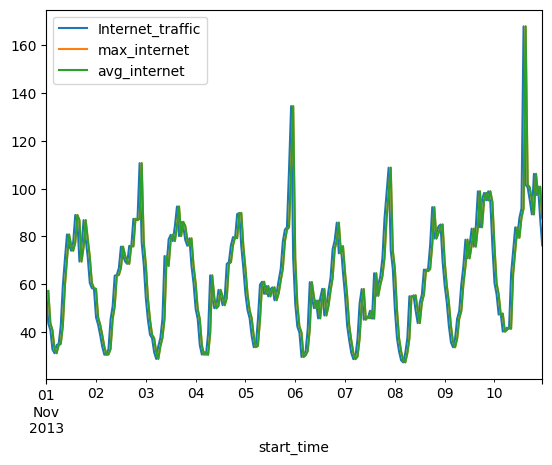

In [131]:
grids_sum_data.plot()

In [129]:
grids_hourly = grids_sum_data
grids_hourly['avg_internet'] = grids_sum_data['Internet_traffic'].shift(1)

In [132]:
grids_hourly = grids_hourly.dropna()
grids_hourly.head()

,Internet_traffic,max_internet,avg_internet
start_time,,,
2013-11-01 01:00:00,43.534991,57.083579,57.083579
2013-11-01 02:00:00,40.661037,43.534991,43.534991
2013-11-01 03:00:00,32.545863,40.661037,40.661037
2013-11-01 04:00:00,30.989283,32.545863,32.545863
2013-11-01 05:00:00,34.394700,30.989283,30.989283


In [133]:
split = '2013-11-10 00:00:00'
train = grids_hourly.loc[Hour.index < split]
test = grids_hourly.loc[Hour.index >= split]

In [134]:
features = ['avg_internet']
target = 'Internet_traffic'

In [135]:
max_model = LinearRegression()
max_model.fit(train[features], train[target])

LinearRegression()

In [136]:
# predict the central grid of 3x3 sliding window
predicted_df = hour_data.loc[grid_array[2, 2]]
predicted_df['predicted_traffic'] = max_model.predict(hour_data['Internet_traffic']
                                                      .loc[grid_array[2, 2]]
                                                      .values.reshape((-1, 1)))

/Users/mith/opt/anaconda3/envs/Project_CS/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/var/folders/yt/vt2nsgcj3mn_2hpygxfqs0_w0000gn/T/ipykernel_5024/733786027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_df['predicted_traffic'] = max_model.predict(hour_data['Internet_traffic']


In [137]:
predicted_df

,Time_interval,Country_code,SMS_in,SMS_out,Call_in,Call_out,Internet_traffic,predicted_traffic
start_time,,,,,,,,
2013-11-01 00:00:00,17982403800000,267,2.099283,1.070229,0.612802,0.447650,58.038732,58.472965
2013-11-01 01:00:00,15215920800000,234,1.194217,0.776626,0.193809,0.193812,44.263296,46.513340
2013-11-01 02:00:00,12449422200000,316,0.414917,0.304392,0.028653,0.139211,41.460763,44.080223
2013-11-01 03:00:00,9682907400000,234,1.150677,0.909063,0.000000,0.028653,33.139160,36.855533
2013-11-01 04:00:00,8299657800000,234,0.361669,0.529562,0.000004,0.028657,31.535239,35.463033
...,...,...,...,...,...,...,...,...
2013-11-10 19:00:00,26298048000000,994,4.315298,2.879679,3.271300,3.617843,108.268734,102.081895
2013-11-10 20:00:00,34602787200000,1860,5.407043,3.621922,3.179941,3.254814,99.008196,94.042036
2013-11-10 21:00:00,26298190800000,533,6.815559,5.539463,1.865666,1.873800,102.790223,97.325535


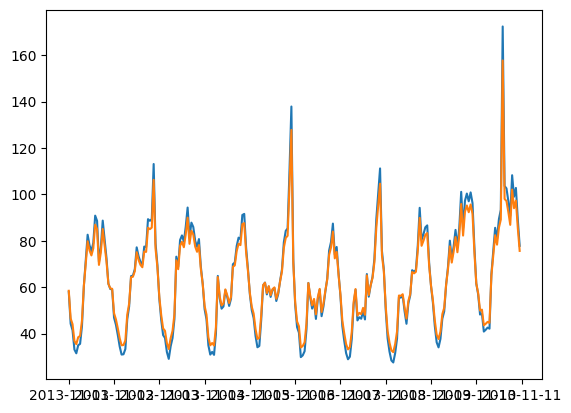

In [138]:
plt.plot(predicted_df.index, predicted_df['Internet_traffic'])
plt.plot(predicted_df.index, predicted_df['predicted_traffic'])